# Extra Experiment

This document **will not** upload, It is only for some explorment about the clustering algorithms

## 1. PCA + DBSCAN

It seems that DBSCAN in iris did not earn a perfect result. Therefore, we are tring to make a PCA firstly to see will the performance will be improved.

First of all, Prepare Iris to make the PCA and DBSCAN

In [1]:
# prepare Iris for the assignment
import pandas as pd
iris = pd.read_csv('iris.txt',header = None)
iris.columns = ['sepal-L','sepal-W','petal-L','petal-W','class'] 
iris_cluster = pd.DataFrame.copy(iris, deep = True)
iris_cluster = iris.drop('class', axis = 1 )
iris_cluster

,sepal-L,sepal-W,petal-L,petal-W
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Let make a PCA, define 2 features firstly.

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(iris_cluster)
display(pca[:5,:])

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

In [6]:
iris_cluster['z1'] = pca[:,0]
iris_cluster['z2'] = pca[:,1]
iris_cluster

,sepal-L,sepal-W,petal-L,petal-W,z1,z2
0,5.1,3.5,1.4,0.2,-2.684207,0.326607
1,4.9,3.0,1.4,0.2,-2.715391,-0.169557
2,4.7,3.2,1.3,0.2,-2.889820,-0.137346
3,4.6,3.1,1.5,0.2,-2.746437,-0.311124
4,5.0,3.6,1.4,0.2,-2.728593,0.333925
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.944017,0.187415
146,6.3,2.5,5.0,1.9,1.525664,-0.375021
147,6.5,3.0,5.2,2.0,1.764046,0.078519
148,6.2,3.4,5.4,2.3,1.901629,0.115877


We will make a DBSCAN

Text(0.5, 0.98, 'The result')

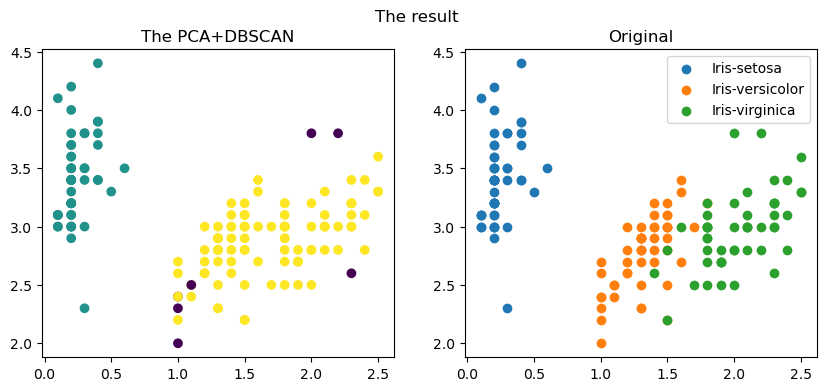

In [44]:
import numpy as num
from sklearn.cluster import DBSCAN

%matplotlib inline
plt.figure(figsize=(10, 4)) 

import matplotlib.pyplot as plt
db = DBSCAN(eps=0.5, min_samples=5,algorithm = 'auto').fit(pca)
core_samples_mask = num.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Class'])
iris_DBScan_result = pd.concat((iris_cluster,labels), axis=1)
plt.subplot(121)
plt.scatter(x=iris_DBScan_result['petal-W'],y= iris_DBScan_result['sepal-W'], c=iris_DBScan_result['Class'])
plt.title("The PCA+DBSCAN")


#Make comparsion
plt.subplot(122)
Original = pd.read_csv('iris.txt',header = None)
Original.columns = ['sepal-L','sepal-W','petal-L','petal-W','class'] 
Original_clustering = Original.groupby("class")
for name, group in Original_clustering:
    plt.scatter(group['petal-W'],group['sepal-W'],label = name)
plt.title("Original")
plt.legend()

plt.suptitle("The result")


Not very well......